Step 1 Setup

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 67.4k/67.4k [00:00<00:00, 48.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


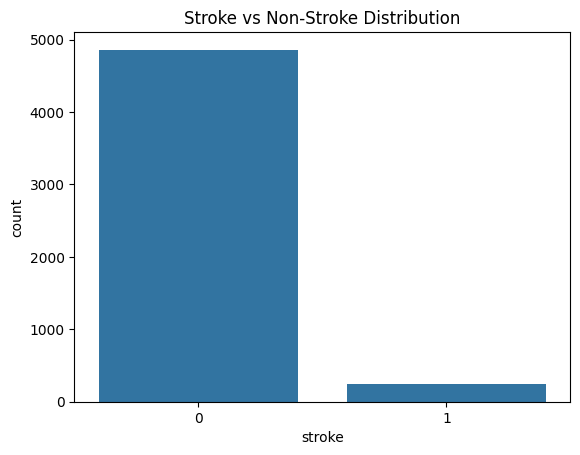

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Check for stroke distribution
print(df['stroke'].value_counts(normalize=True) * 100)

sns.countplot(x='stroke', data=df)
plt.title("Stroke vs Non-Stroke Distribution")
plt.show()


Step 2 Load data

In [4]:
#Load data
df = pd.read_csv(path + "/healthcare-dataset-stroke-data.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Step 3: Data cleaning and Wrangling

In [60]:
#replace missing BMI data with mean
df['bmi'].fillna((df['bmi'].mean()), inplace=True)
df.head()

/tmp/ipython-input-1547855985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna((df['bmi'].mean()), inplace=True)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group,bmi_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,61-70,High,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,61-70,High,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,81-90,Low,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,41-50,Low,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,71-80,Low,Normal


Step 4: Exploratory Data Analysis(EDA)


Group the 'age' column into bins to reduce the number of distinct categories.


In [12]:
# Define bins and labels for age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'age_group' by binning the 'age' column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the first few rows with the new 'age_group' column
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,61-70
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,61-70
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,81-90
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,41-50
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,71-80


In [13]:
# Group by age_group and stroke, count occurrences
stroke_counts = df.groupby(['age_group', 'stroke']).size()

# Unstack and fill missing values
stroke_counts_unstacked = stroke_counts.unstack().fillna(0)

# Rename columns for clarity
stroke_counts_unstacked.columns = ['No Stroke', 'Stroke']

# Display the resulting DataFrame
display(stroke_counts_unstacked)

/tmp/ipython-input-4085231619.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_counts = df.groupby(['age_group', 'stroke']).size()


,No Stroke,Stroke
age_group,,
0-10,471,1
11-20,493,1
21-30,549,0
31-40,649,6
41-50,718,12
51-60,786,48
61-70,574,47
71-80,475,94
81-90,146,40


## Data visualization

### Subtask:
Create a new count plot using the age bins and stroke data.


**Reasoning**:
Create a count plot using the age bins and stroke data.



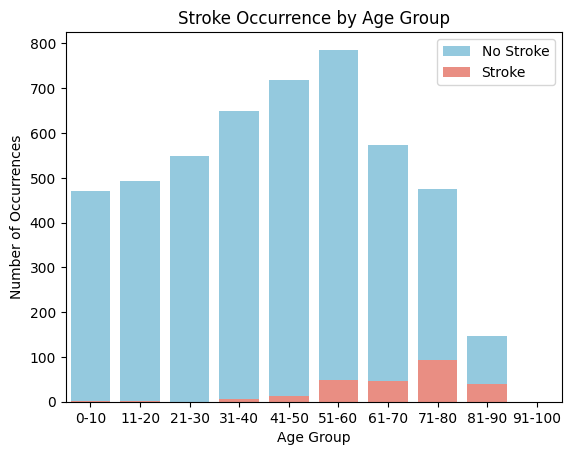

In [14]:
# Create a count plot using the stroke_counts_unstacked DataFrame
stroke_counts_unstacked_reset = stroke_counts_unstacked.reset_index()
sns.barplot(x='age_group', y='No Stroke', data=stroke_counts_unstacked_reset, color='skyblue', label='No Stroke')
sns.barplot(x='age_group', y='Stroke', data=stroke_counts_unstacked_reset, color='salmon', label='Stroke')

# Set the title of the plot
plt.title('Stroke Occurrence by Age Group')

# Add appropriate labels to the x and y axes
plt.xlabel('Age Group')
plt.ylabel('Number of Occurrences')
plt.legend()

# Display the plot
plt.show()

av_glucose_level and stroke

**Data wrangling**: Create a new column to categorize glucose levels into 'High' (>= 200) and 'Low' (< 200).

In [27]:
df['glucose_group'] = df['avg_glucose_level'].apply(lambda x: 'High' if x >= 200 else 'Low')
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,61-70,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,61-70,High
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,81-90,Low
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,41-50,Low
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,71-80,Low


**Data analysis**: Group the data by the new glucose category and stroke, and count the occurrences.

In [28]:
grouped_data = df.groupby(['glucose_group', 'stroke']).size()
grouped_unstacked = grouped_data.unstack().fillna(0)
grouped_unstacked.columns = ['No Stroke', 'Stroke']
display(grouped_unstacked)

,No Stroke,Stroke
glucose_group,,
High,378,56
Low,4483,193


**Data visualization**: Create a bar plot to visualize the stroke occurrence for each glucose category.

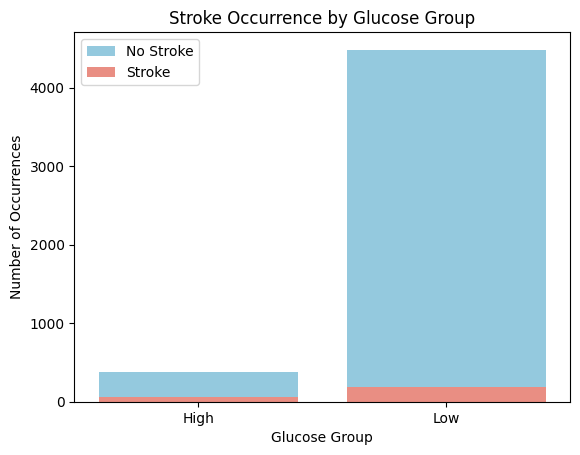

In [29]:
grouped_unstacked_reset = grouped_unstacked.reset_index()

sns.barplot(x='glucose_group', y='No Stroke', data=grouped_unstacked_reset, color='skyblue', label='No Stroke')
sns.barplot(x='glucose_group', y='Stroke', data=grouped_unstacked_reset, color='salmon', label='Stroke')

plt.xlabel('Glucose Group')
plt.ylabel('Number of Occurrences')
plt.title('Stroke Occurrence by Glucose Group')
plt.legend()
plt.show()

BMI and Stroke

In [35]:
# creat BMI sub catagory as: 18.5=< x >=24.9, 25.0 < x <29.9 and > 30
# define subgroup values
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_group'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=True)

# Group by bmi_group and stroke, count occurrences
bmi_stroke_counts = df.groupby(['bmi_group', 'stroke']).size()

# Unstack and rename columns
bmi_stroke_counts_unstacked = bmi_stroke_counts.unstack().fillna(0)
bmi_stroke_counts_unstacked.columns = ['No Stroke', 'Stroke']

# Display the resulting DataFrame
display(bmi_stroke_counts_unstacked)

/tmp/ipython-input-925252664.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_stroke_counts = df.groupby(['bmi_group', 'stroke']).size()


,No Stroke,Stroke
bmi_group,,
Underweight,348,1
Normal,1196,35
Overweight,1495,115
Obese,1822,98


Text(0.5, 1.0, 'Stroke Occurrence by BMI Group')

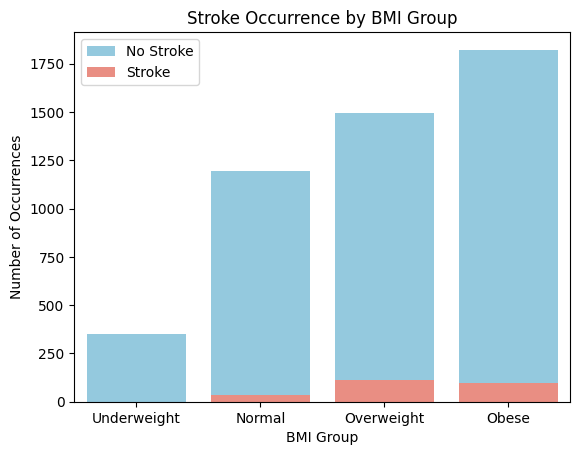

In [41]:
#plot value count for stroke occurrence in bmi groups
bmi_stroke_counts_unstacked_reset = bmi_stroke_counts_unstacked.reset_index()
sns.barplot(x='bmi_group', y='No Stroke', data=bmi_stroke_counts_unstacked_reset, color='skyblue', label='No Stroke')
sns.barplot(x = 'bmi_group', y = 'Stroke', data = bmi_stroke_counts_unstacked_reset, color = 'salmon', label = 'Stroke')
plt.xlabel('BMI Group')
plt.ylabel('Number of Occurrences')
plt.title('Stroke Occurrence by BMI Group')


Hypertension and Stroke

In [45]:
# creat catagory for stroke occurrence and hypertension
hypertension_stroke_counts = df.groupby(['hypertension', 'stroke']).size()
# rename catagory columon asstroke and no stroke
hypertension_stroke_counts_unstacked = hypertension_stroke_counts.unstack().fillna(0)
hypertension_stroke_counts_unstacked.columns = ['No Stroke', 'Stroke']
display(hypertension_stroke_counts_unstacked)

,No Stroke,Stroke
hypertension,,
0,4429,183
1,432,66


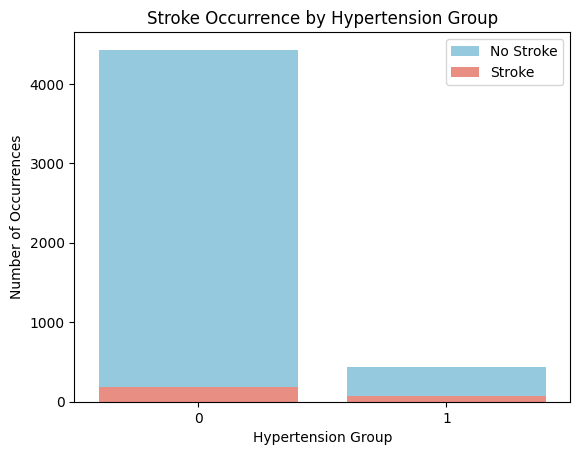

In [52]:
#plot for stroke occurrence in hypertension group
hypertension_stroke_counts_unstacked_reset = hypertension_stroke_counts_unstacked.reset_index()
sns.barplot(x='hypertension', y='No Stroke', data=hypertension_stroke_counts_unstacked_reset, color='skyblue', label='No Stroke')
sns.barplot(x='hypertension', y='Stroke', data=hypertension_stroke_counts_unstacked_reset, color='salmon', label='Stroke')
plt.xlabel('Hypertension Group')
plt.ylabel('Number of Occurrences')
plt.title('Stroke Occurrence by Hypertension Group')
plt.legend()
plt.show()

Heart diseases and Stroke

In [48]:
# creat catagory for heart_disease and stroke
df.groupby(['heart_disease', 'stroke']).size()
# rename catagory and display
heart_disease_stroke_counts = df.groupby(['heart_disease', 'stroke']).size()
heart_disease_stroke_counts_unstacked = heart_disease_stroke_counts.unstack().fillna(0)
heart_disease_stroke_counts_unstacked.columns = ['No Stroke', 'Stroke']
display(heart_disease_stroke_counts_unstacked)


,No Stroke,Stroke
heart_disease,,
0,4632,202
1,229,47


Text(0.5, 1.0, 'Stroke Occurrence by Heart Disease Group')

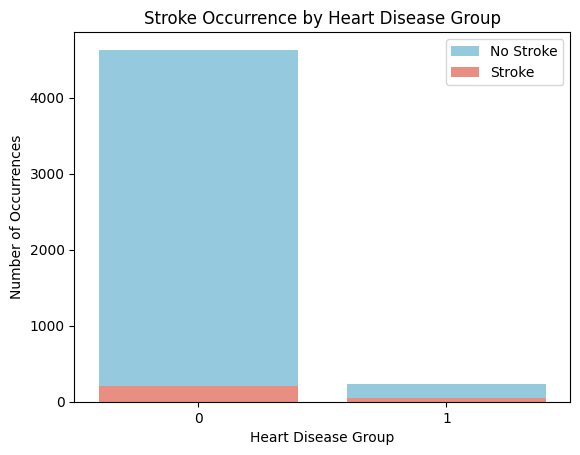

In [50]:
# plot barchart for stroke occurrence in heart_diseases group
heart_disease_stroke_counts_unstacked_reset = heart_disease_stroke_counts_unstacked.reset_index()
sns.barplot(x = heart_disease_stroke_counts_unstacked_reset.index, y = 'No Stroke', data = heart_disease_stroke_counts_unstacked_reset, color = 'skyblue', label = 'No Stroke')
sns.barplot(x = heart_disease_stroke_counts_unstacked_reset.index, y = 'Stroke', data = heart_disease_stroke_counts_unstacked_reset, color = 'salmon', label = 'Stroke')
plt.xlabel('Heart Disease Group')
plt.ylabel('Number of Occurrences')
plt.title('Stroke Occurrence by Heart Disease Group')

Step 5: Correlation Analysis

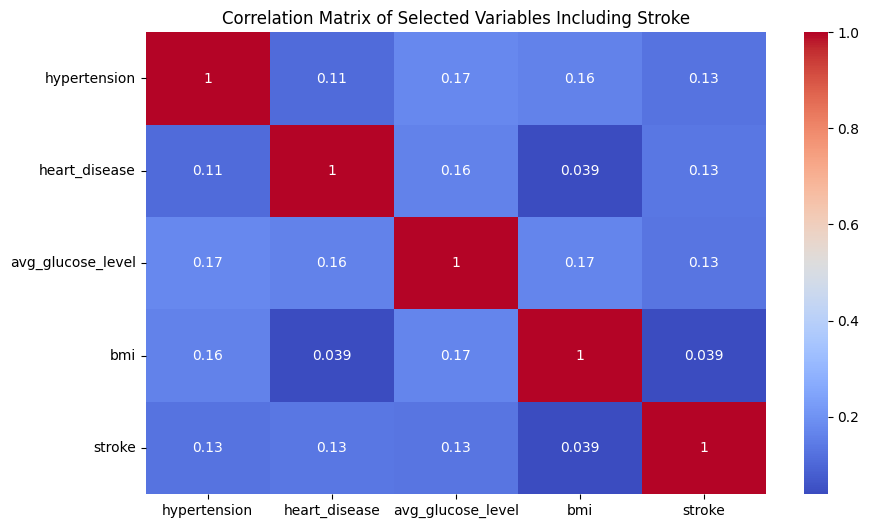

In [54]:
# Heatmap to see correlations between variables.
correlation_cols = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr = df[correlation_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Selected Variables Including Stroke')
plt.show()

Step 6: Modeling (Predicting Stroke)

In [62]:
# Select features and target variable
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Drop the 'age_group' and 'bmi_group' columns as they are categorical representations of numerical data
X = X.drop(['age_group', 'bmi_group', 'glucose_group'], axis=1)


# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9393346379647749
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Step 7: Model Refinement


In [64]:
# Random Forest or Gradient Boosting
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Accuracy: 0.9393346379647749


Logistic Regression + Random Forest

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced")
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       960
           1       0.17      0.82      0.28        62

    accuracy                           0.75      1022
   macro avg       0.58      0.78      0.56      1022
weighted avg       0.94      0.75      0.81      1022

ROC-AUC: 0.8504368279569892

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

ROC-AUC: 0.8102738575268817


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Curve Visualization

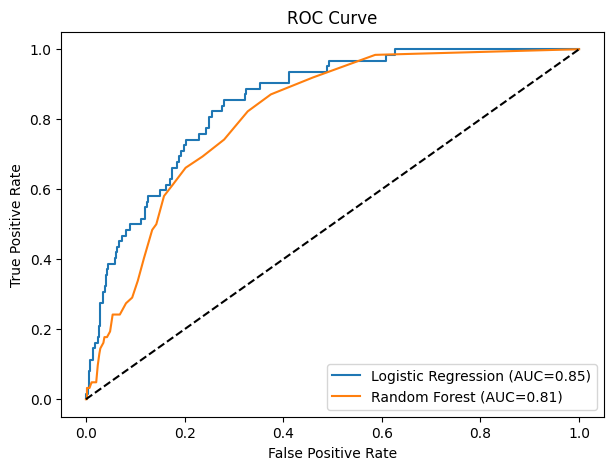

In [67]:
plt.figure(figsize=(7,5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
